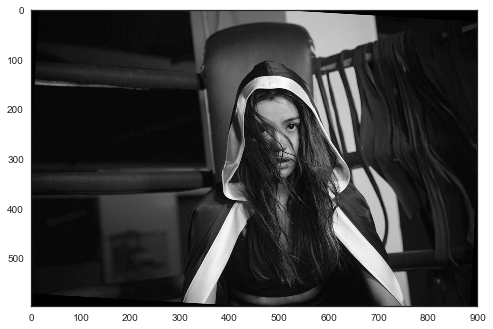

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


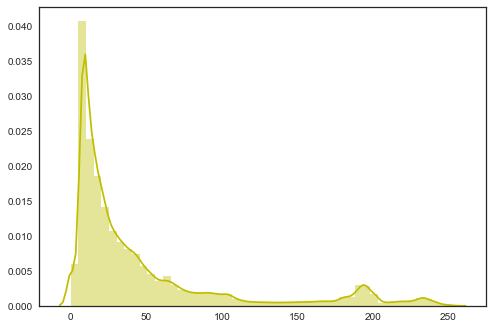

In [1]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from scipy.linalg import solve
import seaborn as sns
sns.set_style("white")
im = Image.open('fa.jpeg')
im = np.asarray(im.convert('L'))
plt.imshow(im)
plt.gray()
plt.show()
ax = sns.distplot(im.flatten(), color="y")

In [90]:
# 平均零，
filter_size = (3,3)
half_filter = filter_size[0]//2
sigma = 3
k = 2
#先幫原圖加上padding
def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 255
    vector[-pad_width[1]:] = 255
    return vector
padding_f = np.lib.pad(im,half_filter,padwithzeros)
x,y = np.mgrid[-half_filter:half_filter+1,-half_filter:half_filter+1]
gauss_kern = np.exp(-(x**2+y**2)/(2*(sigma**2)))

In [91]:
#使用高斯濾波
new_pic = np.zeros(im.shape)
it = np.nditer(new_pic,flags = ['multi_index'],op_flags = ['readwrite'])
neighbor_area = np.zeros(filter_size)
while not it.finished:
    neighbor_area = padding_f[it.multi_index[0]:it.multi_index[0]+filter_size[0],it.multi_index[1]:it.multi_index[1]+filter_size[0]]
    it[0] = np.sum(np.multiply(neighbor_area,gauss_kern))/np.sum(gauss_kern)
    it.iternext()

[[ 21.23914305  21.26359311  25.30841768 ...,  33.11957153  31.81115384
   37.61683537]
 [ 21.69158232  21.69158232  25.30841768 ...,  37.64128542  35.42798921
   41.68611   ]
 [ 21.69158232  21.23914305  24.88042847 ...,  33.09512147  35.45243927
   41.68611   ]
 ..., 
 [  3.50273616  11.18884616  15.23367073 ...,   9.42798921  11.18884616
    3.05029689]
 [  0.76632927   8.          11.61683537 ...,  11.18884616  12.04482457
    3.95517543]
 [ -0.56653847   7.11957153  11.21329622 ...,   6.69158232  12.09372469
    3.93072537]]


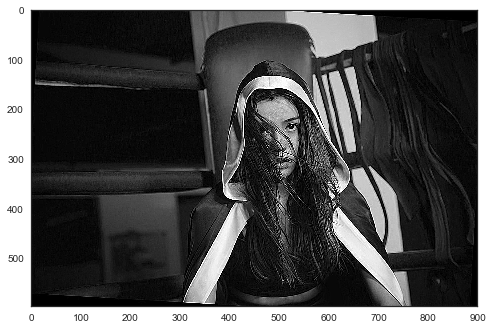

In [99]:
k=4
gmask = im-new_pic
g = im+k*gmask
print(g[100:200,100:200])
g= np.rint(g)
g[g<0] = 0
g[g>255] = 255
g.astype(np.uint8)
plt.imshow(g)

plt.show()